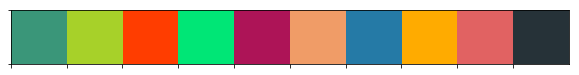

In [1]:
import requests
import urllib.request
import pandas as pd
import re
import json
from time import time
from datetime import datetime, timedelta
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

palette = ["#3a9679", "#a7d129","#ff3d00", "#00e676", "#ad1457", "#f09c67", "#257aa6", 
           "#ffab00", "#e16262", "#263238"]

sns.palplot(sns.color_palette(palette))

In [2]:
timeFinish = 0
start_time = time()

In [3]:
url = 'https://www.billboard.com/charts/hot-100'
path_file_dest = r'billboard.json'
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Platform; Security; OS-or-CPU; Localization; rv:1.4) Gecko/20030624 Netscape/7.1 (ax)'})

In [4]:
def write_doc_json(content, mode):
    own_file = open(path_file_dest, mode, encoding='utf-8')
    own_file.write(content.decode('utf-8'))
    own_file.close()
    print('\n•  El archivo json fue sobre-escrito con exito!')

In [5]:
if response.status_code == 200:
    
    info = []
    soup = BeautifulSoup(response.text, "html.parser")
    data = soup.findAll('div', attrs={'class': 'chart-list-item__first-row chart-list-item__cursor-pointer'})
    
    for x in range (0, len(data)):
        puesto = data[x].find('div', {'class': 'chart-list-item__rank'}).get_text()
        tema = data[x].find('span', {'class': 'chart-list-item__title-text'}).get_text()
        cantante = data[x].find('div', {'chart-list-item__artist'}).get_text()
        
        individuo = {'Puesto' : puesto.replace("\n",""), 
                    'Tema' : tema.replace("\n",""), 
                    'cantante' : cantante.replace("\n","")}
        
        info.append(individuo)
    
    content = json.dumps(info, indent=4, sort_keys=True, ensure_ascii=False).encode('utf-8')
    write_doc_json(content ,'w+')
    data = pd.read_json(path_file_dest, encoding = 'UTF-8')
    print('•  Se leyo el json y se creo el dataframe data')
else:
    print('No se pudo conectar')


•  El archivo json fue sobre-escrito con exito!
•  Se leyo el json y se creo el dataframe data


In [6]:
data.head()

,Puesto,Tema,cantante
0,1,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus
1,2,ME!,Taylor Swift Featuring Brendon Urie
2,3,Wow.,Post Malone
3,4,Sucker,Jonas Brothers
4,5,Sunflower (Spider-Man: Into The Spider-Verse),Post Malone & Swae Lee


In [7]:
data.cantante = data.cantante.apply(lambda x: x.replace('Featuring', '&'))
data['cancion'] = data.Tema + ' (' + data.cantante + ')'
canciones = data.cancion
data.head()

,Puesto,Tema,cantante,cancion
0,1,Old Town Road,Lil Nas X & Billy Ray Cyrus,Old Town Road (Lil Nas X & Billy Ray Cyrus)
1,2,ME!,Taylor Swift & Brendon Urie,ME! (Taylor Swift & Brendon Urie)
2,3,Wow.,Post Malone,Wow. (Post Malone)
3,4,Sucker,Jonas Brothers,Sucker (Jonas Brothers)
4,5,Sunflower (Spider-Man: Into The Spider-Verse),Post Malone & Swae Lee,Sunflower (Spider-Man: Into The Spider-Verse) ...


In [8]:
print('''\nObteniendo duracion, ranking Deezer y si el contenido de la letra 
y la tapa del cd son explicitos en cada tema ... \n''')

for x in range (0, len(canciones)):
    url = 'https://api.deezer.com/search?q=' + str(canciones[x])
    
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Platform; Security; OS-or-CPU; Localization; rv:1.4) Gecko/20030624 Netscape/7.1 (ax)'})
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        newDictionary=json.loads(str(soup))
        if len(newDictionary['data']) != 0:
            data.loc[x, 'time'] = newDictionary['data'][0]['duration']
            data.loc[x, 'deezer_rank'] = newDictionary['data'][0]['rank']
            data.loc[x, 'explicit_lyrics'] = newDictionary['data'][0]['explicit_lyrics']
            data.loc[x, 'explicit_content_lyrics'] = newDictionary['data'][0]['explicit_content_lyrics']
            data.loc[x, 'explicit_content_cover'] = newDictionary['data'][0]['explicit_content_cover']
        else:
            data.loc[x, 'time'] = 0
            data.loc[x, 'deezer_rank'] = -1
            data.loc[x, 'explicit_lyrics'] = False
            data.loc[x, 'explicit_content_lyrics'] = -1
            data.loc[x, 'explicit_content_cover'] = -1
            
        if x != 0:
            if x%10 == 0:
                print('      • ' + str(x) + ' temas obtenidos')
        
        if x == 99:
            print('\nSe obtuvieron las duraciones y los rankings de los 100 temas')
        
    else:
        print('Error al conectar a la siguiente Url:  ' + str(url))



Obteniendo duracion, ranking Deezer y si el contenido de la letra 
y la tapa del cd son explicitos en cada tema ... 

      • 10 temas obtenidos
      • 20 temas obtenidos
      • 30 temas obtenidos
      • 40 temas obtenidos
      • 50 temas obtenidos
      • 60 temas obtenidos
      • 70 temas obtenidos
      • 80 temas obtenidos
      • 90 temas obtenidos

Se obtuvieron las duraciones y los rankings de los 100 temas


In [9]:
print(data.time[data.time == -1].sum())
print(data.deezer_rank[data.deezer_rank == -1].sum())
print(data.explicit_lyrics[data.explicit_lyrics == -1].sum())
print(data.explicit_content_lyrics[data.explicit_content_lyrics == -1].sum())
print(data.explicit_content_cover[data.explicit_content_cover == -1].sum())

0.0
-1.0
0
-1.0
-1.0


In [10]:
data.head()

,Puesto,Tema,cantante,cancion,time,deezer_rank,explicit_lyrics,explicit_content_lyrics,explicit_content_cover
0,1,Old Town Road,Lil Nas X & Billy Ray Cyrus,Old Town Road (Lil Nas X & Billy Ray Cyrus),113.0,979037.0,False,0.0,2.0
1,2,ME!,Taylor Swift & Brendon Urie,ME! (Taylor Swift & Brendon Urie),211.0,861619.0,False,0.0,0.0
2,3,Wow.,Post Malone,Wow. (Post Malone),149.0,982674.0,True,1.0,0.0
3,4,Sucker,Jonas Brothers,Sucker (Jonas Brothers),181.0,993735.0,False,0.0,0.0
4,5,Sunflower (Spider-Man: Into The Spider-Verse),Post Malone & Swae Lee,Sunflower (Spider-Man: Into The Spider-Verse) ...,158.0,977157.0,False,0.0,0.0


In [11]:
data.explicit_lyrics = data.explicit_lyrics.apply(lambda x: 1 if x == True else 0)

In [12]:
data.head()

,Puesto,Tema,cantante,cancion,time,deezer_rank,explicit_lyrics,explicit_content_lyrics,explicit_content_cover
0,1,Old Town Road,Lil Nas X & Billy Ray Cyrus,Old Town Road (Lil Nas X & Billy Ray Cyrus),113.0,979037.0,0,0.0,2.0
1,2,ME!,Taylor Swift & Brendon Urie,ME! (Taylor Swift & Brendon Urie),211.0,861619.0,0,0.0,0.0
2,3,Wow.,Post Malone,Wow. (Post Malone),149.0,982674.0,1,1.0,0.0
3,4,Sucker,Jonas Brothers,Sucker (Jonas Brothers),181.0,993735.0,0,0.0,0.0
4,5,Sunflower (Spider-Man: Into The Spider-Verse),Post Malone & Swae Lee,Sunflower (Spider-Man: Into The Spider-Verse) ...,158.0,977157.0,0,0.0,0.0


In [13]:
data.dtypes

Puesto                       int64
Tema                        object
cantante                    object
cancion                     object
time                       float64
deezer_rank                float64
explicit_lyrics              int64
explicit_content_lyrics    float64
explicit_content_cover     float64
dtype: object

In [14]:
import numpy as np
data['time'] = data['time'].apply(np.int64)
data['deezer_rank'] = data['deezer_rank'].apply(np.int64)
data['explicit_content_lyrics'] = data['explicit_content_lyrics'].apply(np.int64)
data['explicit_content_cover'] = data['explicit_content_cover'].apply(np.int64)

In [15]:
data.dtypes

Puesto                      int64
Tema                       object
cantante                   object
cancion                    object
time                        int64
deezer_rank                 int64
explicit_lyrics             int64
explicit_content_lyrics     int64
explicit_content_cover      int64
dtype: object

In [16]:
data.head()

,Puesto,Tema,cantante,cancion,time,deezer_rank,explicit_lyrics,explicit_content_lyrics,explicit_content_cover
0,1,Old Town Road,Lil Nas X & Billy Ray Cyrus,Old Town Road (Lil Nas X & Billy Ray Cyrus),113,979037,0,0,2
1,2,ME!,Taylor Swift & Brendon Urie,ME! (Taylor Swift & Brendon Urie),211,861619,0,0,0
2,3,Wow.,Post Malone,Wow. (Post Malone),149,982674,1,1,0
3,4,Sucker,Jonas Brothers,Sucker (Jonas Brothers),181,993735,0,0,0
4,5,Sunflower (Spider-Man: Into The Spider-Verse),Post Malone & Swae Lee,Sunflower (Spider-Man: Into The Spider-Verse) ...,158,977157,0,0,0


In [17]:
artistas = data.cantante

In [18]:
for x in range (0, len(artistas)):
    url = 'https://www.google.es/search?ei=kZzMXKWUJpy75OUPs6OvqAc&q=' + artistas[x].split(' &')[0] + '+edad&oq=' + artistas[x].split(' &')[0] + '+edad&gs_l=psy-ab.3..0i70i251.7054.7621..7845...0.0..0.109.421.4j1......0....1..gws-wiz.......0i67j0j0i22i30.__AALxE8064'
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Platform; Security; OS-or-CPU; Localization; rv:1.4) Gecko/20030624 Netscape/7.1 (ax)'})
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        
        nacimiento = soup.find('span', {'class': 'A1t5ne'})
        
        if nacimiento is None:
            fechaNacimiento == 'sd'
        else:
            fechaNacimiento = soup.find('span', {'class': 'A1t5ne'}).get_text()
        
        data.loc[x, 'nacimiento'] = fechaNacimiento

In [19]:
data.head(3)

,Puesto,Tema,cantante,cancion,time,deezer_rank,explicit_lyrics,explicit_content_lyrics,explicit_content_cover,nacimiento
0,1,Old Town Road,Lil Nas X & Billy Ray Cyrus,Old Town Road (Lil Nas X & Billy Ray Cyrus),113,979037,0,0,2,"9 de abril de 1999 (edad 20 años), Atlanta, Ge..."
1,2,ME!,Taylor Swift & Brendon Urie,ME! (Taylor Swift & Brendon Urie),211,861619,0,0,0,"13 de diciembre de 1989 (edad 29 años), Readin..."
2,3,Wow.,Post Malone,Wow. (Post Malone),149,982674,1,1,0,"4 de julio de 1995 (edad 23 años), Siracusa, N..."


In [20]:
nuevaData = data.nacimiento

In [21]:
def mesANumero(string):
    m = {
        'enero': "1",
        'febrero': "2",
        'marzo': "3",
        'abril': "4",
        'mayo': "5",
        'junio': "6",
        'julio': "7",
        'agosto': "8",
        'septiembre': "9",
        'octubre': "10",
        'noviembre': "11",
        'diciembre': "12"
        }

    fecha = string.split(" ")
    dia =  fecha[0]
    mes =  fecha[2]
    anio = fecha[4]

    try:
        
        out = str(m[mes.lower()])
        return dia + "-" +  out + "-" + anio
    except:
        
        raise ValueError('No es un mes')
        
for x in range (0, len(nuevaData)):
    
    elementos = len(nuevaData[x].split(','))
    separar = nuevaData[x].split(',')

    if elementos == 5:
        
        ciudad = separar[2]
        provincia = separar[3]
        pais = separar[4]
        nacimiento = separar[0].split('(')
        fecha_final = mesANumero(nacimiento[0])
        
    elif elementos == 4:
        
        verificacion = [k for k in separar[0] if k.isdigit()]
        
        ciudad = separar[1]
        provincia = separar[2]
        pais = separar[3]
        
        if len(verificacion) <= 4:
            
            fecha_final = ''
            
        else:
            
            nacimiento = separar[0].split('(')
            fecha_final = mesANumero(nacimiento[0])
            
    elif elementos == 3:
        
        verificacion = [k for k in separar[0] if k.isdigit()]
        
        if len(verificacion) == 0:
            
            nacimiento = ''
            ciudad = separar[0]
            provincia = separar[1]
            pais = separar[2]
 
        if len(verificacion) != 0:
        
            ciudad = ''
            provincia = separar[1]
            pais = separar[2]
            nacimiento = separar[0].split('(')
            fecha_final = mesANumero(nacimiento[0])
            
    else :
        
        ciudad = 'sd'
        provincia = 'sd'
        pais = 'sd'
        fecha_final = 'sd'
            
    data.loc[x, 'fecha_nacimiento'] = fecha_final
    data.loc[x, 'ciudad'] = ciudad
    data.loc[x, 'provincia'] = provincia
    data.loc[x, 'pais'] = pais

In [22]:
data.head(2)

,Puesto,Tema,cantante,cancion,time,deezer_rank,explicit_lyrics,explicit_content_lyrics,explicit_content_cover,nacimiento,fecha_nacimiento,ciudad,provincia,pais
0,1,Old Town Road,Lil Nas X & Billy Ray Cyrus,Old Town Road (Lil Nas X & Billy Ray Cyrus),113,979037,0,0,2,"9 de abril de 1999 (edad 20 años), Atlanta, Ge...",9-4-1999,Atlanta,Georgia,Estados Unidos
1,2,ME!,Taylor Swift & Brendon Urie,ME! (Taylor Swift & Brendon Urie),211,861619,0,0,0,"13 de diciembre de 1989 (edad 29 años), Readin...",13-12-1989,Reading,Pensilvania,Estados Unidos


In [23]:
print(len(data[data.fecha_nacimiento == '']), len(data[data.ciudad == '']), 
      len(data[data.provincia == '']), len(data[data.pais == '']))

1 19 0 0


In [24]:
for x in range (0, len(data)):
    if data.ciudad[x] == '':
        data.loc[x, 'ciudad'] = data.provincia[x]

for x in range (0, len(data)):
    if data.fecha_nacimiento[x] == '':
        data.loc[x, 'fecha_nacimiento'] = 'sd'

In [25]:
print(len(data[data.fecha_nacimiento == '']), len(data[data.ciudad == '']), 
    len(data[data.provincia == '']), len(data[data.pais == '']))

0 0 0 0


In [26]:
data.ciudad = data.ciudad.apply(lambda x : " ".join(x.split()).lower())
data.provincia = data.provincia.apply(lambda x : " ".join(x.split()).lower())
data.pais = data.pais.apply(lambda x : " ".join(x.split()).lower())
data.ciudad = data.ciudad.apply(lambda x : x.replace('lenox hill hospital', 'sd'))
data.ciudad = data.ciudad.apply(lambda x : x.replace('municipio de cheltenham', 'sd'))
data.ciudad = data.ciudad.apply(lambda x : x.replace('halsey', 'sd'))
data.ciudad = data.ciudad.apply(lambda x : x.replace('andrew taggart', 'sd'))
data.provincia = data.provincia.apply(lambda x : x.replace('fráncfort del meno', 'sd'))
data.provincia = data.provincia.apply(lambda x : x.replace('khalid', 'sd'))
data.provincia = data.provincia.apply(lambda x : x.replace('alex pall', 'sd'))
data.pais = data.pais.apply(lambda x : x.replace('benny blanco', 'sd'))
data.pais = data.pais.apply(lambda x : x.replace('rhett bixler', 'sd'))
data.pais = data.pais.apply(lambda x : x.replace('ee. uu.', 'estados unidos'))

In [27]:
data.ciudad.unique()

array(['atlanta', 'reading', 'siracusa', 'boca ratón', 'londres',
       'fort stewart', 'milwaukee', 'fráncfort del meno', 'filadelfia',
       'sd', 'el bronx', 'los ángeles', 'houston', 'sídney', 'cleveland',
       'charlotte', 'highbridge', 'sneedville', 'ada', 'san juan',
       'ormond beach', 'lafayette', 'gifford', 'chattanooga',
       'lawrenceville', 'doylestown', 'valdosta', 'anaheim', 'dixon',
       'sumter', 'mascot', 'norfolk', 'wiesbaden', 'chicago', 'málaga',
       'arlington', 'allentown', 'frayser', 'san francisco', 'carolina',
       'paris', 'condado de broward', 'leesburg', 'estocolmo'],
      dtype=object)

In [28]:
data.provincia.unique()

array(['georgia', 'pensilvania', 'nueva york', 'florida', 'londres',
       'wisconsin', 'sd', 'california', 'texas', 'sídney', 'ohio',
       'carolina del norte', 'tennessee', 'oklahoma', 'san juan',
       'luisiana', 'carolina del sur', 'va 23529', 'wiesbaden',
       'illinois', 'málaga', 'carolina', 'estocolmo'], dtype=object)

In [29]:
data.pais.unique()

array(['estados unidos', 'reino unido', 'alemania', 'australia',
       'puerto rico', 'españa', 'sd', 'suecia'], dtype=object)

In [30]:
print(len(data.ciudad.unique()), len(data.provincia.unique()), len(data.pais.unique()))

44 23 8


In [31]:
data.head(1)

,Puesto,Tema,cantante,cancion,time,deezer_rank,explicit_lyrics,explicit_content_lyrics,explicit_content_cover,nacimiento,fecha_nacimiento,ciudad,provincia,pais
0,1,Old Town Road,Lil Nas X & Billy Ray Cyrus,Old Town Road (Lil Nas X & Billy Ray Cyrus),113,979037,0,0,2,"9 de abril de 1999 (edad 20 años), Atlanta, Ge...",9-4-1999,atlanta,georgia,estados unidos


In [32]:
artistas.head()

0    Lil Nas X & Billy Ray Cyrus
1    Taylor Swift & Brendon Urie
2                    Post Malone
3                 Jonas Brothers
4         Post Malone & Swae Lee
Name: cantante, dtype: object

In [33]:
for x in range (0, len(artistas)):
    url = 'https://www.google.com/search?rlz=1C1GCEU_esAR821AR821&ei=BTbQXLS5C6ik5OUP76uX2A4&q='+artistas[x].split(' &')[0]+'+genero&oq='+artistas[x].split(' &')[0]+'+genero&gs_l=psy-ab.3..0j0i22i30l5.33988.35043..35208...0.0..0.144.765.4j3......0....1..gws-wiz.......0i67j0i131i67j0i131j0i22i10i30.g3gr1OFMcB8'
    responses = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Platform; Security; OS-or-CPU; Localization; rv:1.4) Gecko/20030624 Netscape/7.1 (ax)'})
    if response.status_code == 200:
        soup = BeautifulSoup(responses.text, "html.parser")
        soup_string = str(soup)
        if 'Hip hop' in soup_string:
            data.loc[x, 'genero'] = 'Hip Hop'
        elif 'Rock' in soup_string:
            data.loc[x, 'genero'] = 'Rock'
        elif 'Pop' in soup_string:
            data.loc[x, 'genero'] = 'Pop'
        elif 'Country' in soup_string:
            data.loc[x, 'genero'] = 'Country'
        elif 'Rap' in soup_string:
            data.loc[x, 'genero'] = 'Rap'
        elif 'Future bass' in soup_string:
            data.loc[x, 'genero'] = 'Future bass'   
        else:
            data.loc[x, 'genero'] = 'No Data'

In [34]:
data.head(2)

,Puesto,Tema,cantante,cancion,time,deezer_rank,explicit_lyrics,explicit_content_lyrics,explicit_content_cover,nacimiento,fecha_nacimiento,ciudad,provincia,pais,genero
0,1,Old Town Road,Lil Nas X & Billy Ray Cyrus,Old Town Road (Lil Nas X & Billy Ray Cyrus),113,979037,0,0,2,"9 de abril de 1999 (edad 20 años), Atlanta, Ge...",9-4-1999,atlanta,georgia,estados unidos,Hip Hop
1,2,ME!,Taylor Swift & Brendon Urie,ME! (Taylor Swift & Brendon Urie),211,861619,0,0,0,"13 de diciembre de 1989 (edad 29 años), Readin...",13-12-1989,reading,pensilvania,estados unidos,Pop


In [35]:
for x in range(0, len(data)):
    if data.fecha_nacimiento[x] != 'sd':
        data.loc[x, 'anio'] = data.fecha_nacimiento[x][-4:]
    else:
        data.loc[x, 'anio'] = 'sd'

In [36]:
data.shape

(100, 16)

In [37]:
timeFinish += (time() - start_time)
print('Ending - time: ' + str(timedelta(seconds=timeFinish)))

Ending - time: 0:04:07.121000


In [38]:
data.to_excel('billBoardCompleto.xlsx')

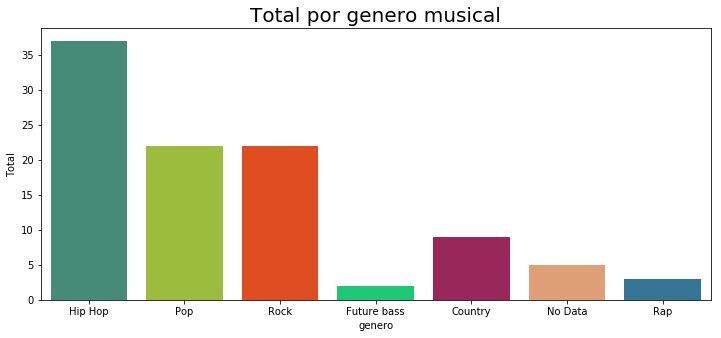

In [39]:
plt.figure(figsize=(12,5))
ax = sns.countplot('genero', data = data,
                  palette= palette)
plt.title('Total por genero musical', size=20)
plt.ylabel('Total')
plt.show()

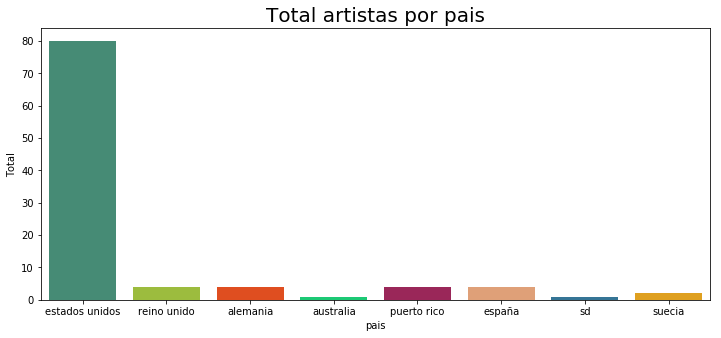

In [40]:
plt.figure(figsize=(12,5))
ax = sns.countplot('pais', data = data,
                  palette= palette)
plt.title('Total artistas por pais', size=20)
plt.ylabel('Total')
plt.show()

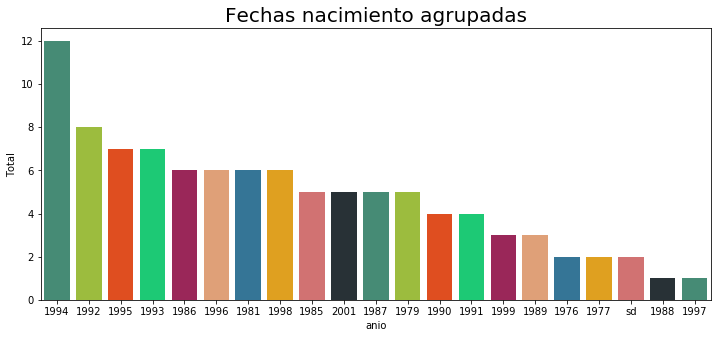

In [41]:
plt.figure(figsize=(12,5))
ax = sns.countplot('anio', data = data,
                  palette= palette,
                  order = data['anio'].value_counts().index)
plt.title('Fechas nacimiento agrupadas', size=20)
plt.ylabel('Total')
plt.show()

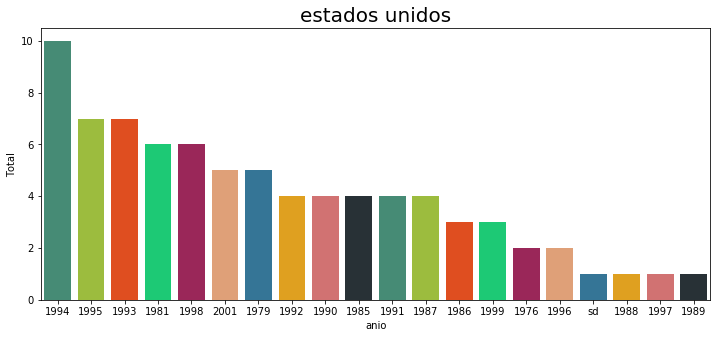

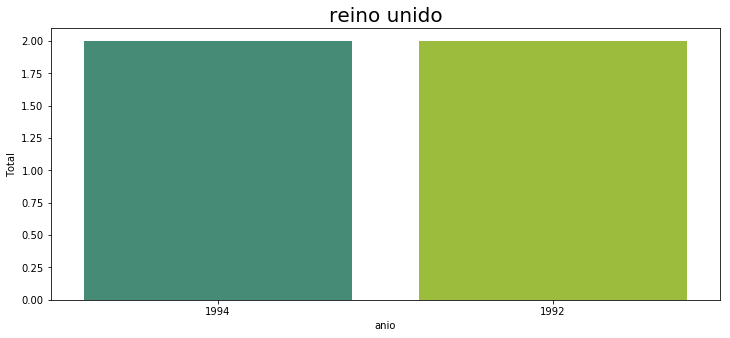

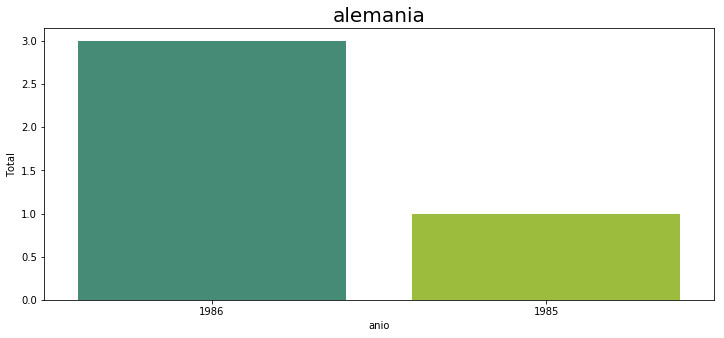

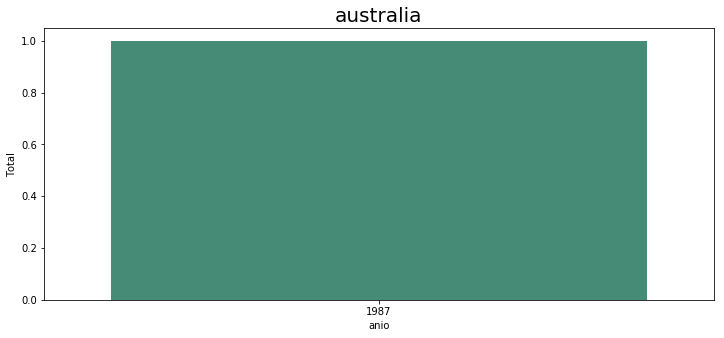

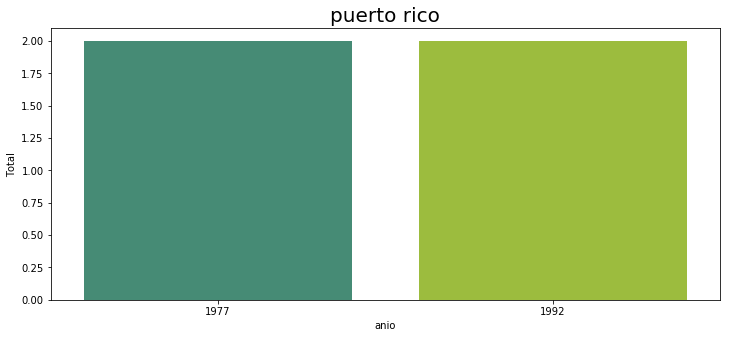

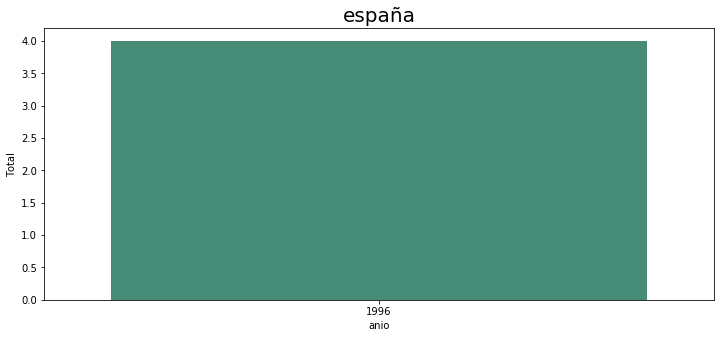

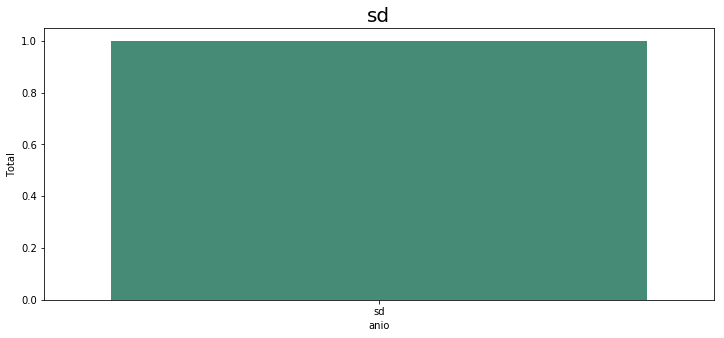

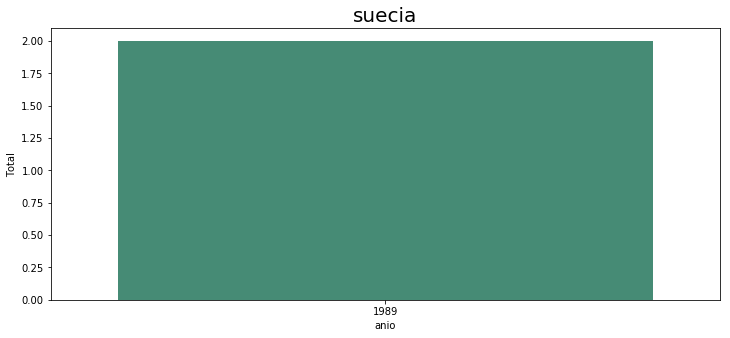

In [42]:
paises = data.pais.unique().tolist()

for x in range(0, len(paises)):
    plt.figure(figsize=(12,5))
    ax = sns.countplot('anio', data = data[data.pais == paises[x]],
                      palette= palette,
                      order = data['anio'][data.pais == paises[x]].value_counts().index)
    plt.title(paises[x], size=20)
    plt.ylabel('Total')
    plt.show()

In [44]:
data.head(1)

,Puesto,Tema,cantante,cancion,time,deezer_rank,explicit_lyrics,explicit_content_lyrics,explicit_content_cover,nacimiento,fecha_nacimiento,ciudad,provincia,pais,genero,anio
0,1,Old Town Road,Lil Nas X & Billy Ray Cyrus,Old Town Road (Lil Nas X & Billy Ray Cyrus),113,979037,0,0,2,"9 de abril de 1999 (edad 20 años), Atlanta, Ge...",9-4-1999,atlanta,georgia,estados unidos,Hip Hop,1999
